In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb
#from sklearn.metrics import plot_confusion_matrix
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

'''
I tried multiple regression modeled after 5 ratios derived from the independent variables. 
Using a split of 0.3 on the training data available, RMSE comes to be nearly ~15.

I have not tried using seasonality (cyclity of these prices at certain intervals in the year) which would involve
cross-referencing 

JPMC round is closed.I'll cleave the December 2018 rows from the dataframe and use it as a parameter to test
the vailidty of the system.




'''

# january 2019 ka predict karna hai

In [98]:
def extractDate(text):
  
  index=text.find("-")
  year=text[0:index]
  
  text=text[index+1:]
  index=text.find("-")
  month=text[0:index]

  text=text[index+1:]
  day=text

  return year, month, day



In [99]:
#load data
df_train=pd.read_csv("/Users/kunaalgautam17/Downloads/Train-2.csv")

#Split date into three parts
year_list=[]
month_list=[]
day_list=[]
for i in range(0, len(df_train)):
  date_code=df_train['Date'][i]
  year, month, day=extractDate(date_code)
  year_list.append(year)
  month_list.append(month)
  day_list.append(day)
df_train['Year']=year_list
df_train['Month']=month_list
df_train['Day']=day_list

#add ratios (and lists)
liab_list = df_train['liabilities'].tolist()
tot_ass_list = df_train['total_assets'].tolist()
curr_ass_list = df_train['current_assets'].tolist()
curr_liab_list = df_train['current_liabilities'].tolist()
inc_list = df_train['net_income'].tolist()
shares_num_list = df_train['shares_outstanding'].tolist()
price_list = df_train['price'].tolist()

DTA=[]
current=[]
ROA=[]
EPS=[]
PE=[]

#DTA 
for i in range(len(liab_list)):
    quotient = liab_list[i] / tot_ass_list[i]
    DTA.append(quotient)

#Current
for i in range(len(curr_ass_list)):
    quotient = curr_ass_list[i] / curr_liab_list[i]
    current.append(quotient)

#ROA
for i in range(len(inc_list)):
    quotient = inc_list[i] / tot_ass_list[i]
    ROA.append(quotient)

#EPS
for i in range(len(inc_list)):
    quotient = inc_list[i] / shares_num_list[i]
    EPS.append(quotient)
    
#PE
for i in range(len(price_list)):
    quotient = price_list[i] / EPS[i]
    PE.append(quotient)
    
#adding to df
df_train['DTA']=DTA
df_train['current']=current
df_train['ROA']=ROA
df_train['EPS']=EPS
df_train['PE']=PE

#delete useless fields
delete_fields=['Date', 'Day', 'liabilities', 'equity', 'total_assets', 'current_assets','current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding']
for item in delete_fields:
  del df_train[item]


In [100]:
#creating different dataframes for analysing each seperately
dfs = {}
for stock in df_train['Stock'].unique():
    dfs[stock] = df_train[df_train['Stock'] == stock]

'''for stock in dfs.keys():
    # print the stock ticker
    print(f"Stock Ticker: {stock}")
    # print the first 5 rows of the stock DataFrame
    print(dfs[stock].head())
    # print a blank line for readability
    print()
    '''
    

'for stock in dfs.keys():\n    # print the stock ticker\n    print(f"Stock Ticker: {stock}")\n    # print the first 5 rows of the stock DataFrame\n    print(dfs[stock].head())\n    # print a blank line for readability\n    print()\n    '

In [112]:
'''#splitting the data into test and train
input_data = dfs['Stock 1'][['DTA','current','ROA','EPS','PE']]
label = dfs['Stock 1']['price']
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size=0.33, random_state=42)

now that i have found out that In this case, the MSE of 241.2259 means that on average, the predicted values
differ from the actual values by approximately 15.52 units (the square root of the MSE). 
The MAE of 13.0215 means that on average, the predicted values differ from the actual values by 
approximately 13.02 units.


'''
X_test= pd.DataFrame()
X_test.insert(0, 'Stock','')


for stock in dfs.keys():
    X_train = dfs[stock][['DTA','current','ROA','EPS','PE']]
    Y_train = dfs[stock]['price']

    #finding X_test - should use last 12 months ka average?
    imp= dfs[stock][dfs[stock]['Year']== '2018']
    
    vimp = imp[['DTA','current','ROA','EPS','PE']].mean()
    vvimp = pd.DataFrame(vimp)
    X_test = pd.concat([X_test, vimp], ignore_index=True)
    print (X_test)


'''
vimp = imp[['DTA','current','ROA','EPS','PE']].mean()
    X_test = pd.concat([X_test, vimp], ignore_index=True)


print (X_test)
import statsmodels.api as sm

#y is dependent and x is independent

y = dfs['Stock 1']['price']
x = dfs['Stock 1'][['DTA','current','ROA','EPS','PE']]



model = sm.OLS(y_train, X_train).fit()

predicted_price = model.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, predicted_price)
mae = mean_absolute_error(y_test, predicted_price)

print(f"Mean squared error: {mse}")
print(f"Mean absolute error: {mae}")



'''



  Stock              0
0   NaN       0.489375
1   NaN       0.927795
2   NaN      -0.037286
3   NaN      -0.000013
4   NaN -590824.476889
  Stock             0
0   NaN  4.893749e-01
1   NaN  9.277954e-01
2   NaN -3.728605e-02
3   NaN -1.271442e-05
4   NaN -5.908245e+05
5   NaN  5.570955e-01
6   NaN  9.710739e-01
7   NaN -7.838759e-02
8   NaN -5.187503e-05
9   NaN -1.110796e+06
   Stock             0
0    NaN  4.893749e-01
1    NaN  9.277954e-01
2    NaN -3.728605e-02
3    NaN -1.271442e-05
4    NaN -5.908245e+05
5    NaN  5.570955e-01
6    NaN  9.710739e-01
7    NaN -7.838759e-02
8    NaN -5.187503e-05
9    NaN -1.110796e+06
10   NaN  4.851096e-01
11   NaN  9.638805e-01
12   NaN -1.789126e-02
13   NaN -1.462591e-05
14   NaN  7.947183e+05
   Stock             0
0    NaN  4.893749e-01
1    NaN  9.277954e-01
2    NaN -3.728605e-02
3    NaN -1.271442e-05
4    NaN -5.908245e+05
5    NaN  5.570955e-01
6    NaN  9.710739e-01
7    NaN -7.838759e-02
8    NaN -5.187503e-05
9    NaN -1.110796e+06

'\nvimp = imp[[\'DTA\',\'current\',\'ROA\',\'EPS\',\'PE\']].mean()\n    X_test = pd.concat([X_test, vimp], ignore_index=True)\n\n\nprint (X_test)\nimport statsmodels.api as sm\n\n#y is dependent and x is independent\n\ny = dfs[\'Stock 1\'][\'price\']\nx = dfs[\'Stock 1\'][[\'DTA\',\'current\',\'ROA\',\'EPS\',\'PE\']]\n\n\n\nmodel = sm.OLS(y_train, X_train).fit()\n\npredicted_price = model.predict(X_test)\n\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.metrics import mean_absolute_error\n\n\nmse = mean_squared_error(y_test, predicted_price)\nmae = mean_absolute_error(y_test, predicted_price)\n\nprint(f"Mean squared error: {mse}")\nprint(f"Mean absolute error: {mae}")\n\n\n\n'

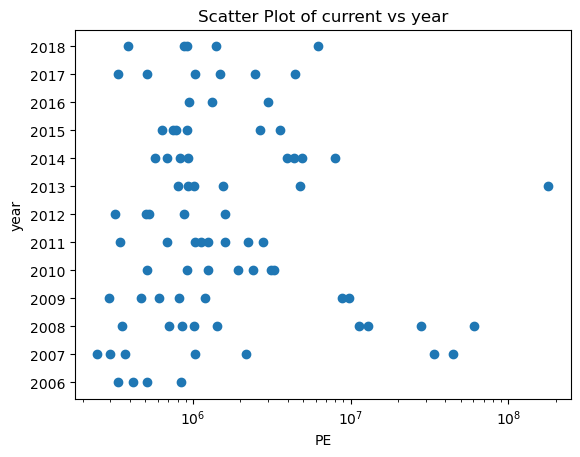

In [102]:

# extracting the columns
x = dfs['Stock 1']['PE']
y = dfs['Stock 1']['Year']

# create a scatter plot of the data
plt.scatter(x, y)

# add labels to the axes
plt.xlabel('PE')
plt.ylabel('year')

plt.xscale('log')


# add a title to the plot
plt.title('Scatter Plot of current vs year')

# display the plot
plt.show()

In [103]:
'''sns.pairplot(df_train, hue="price")

SyntaxError: EOF while scanning triple-quoted string literal (1237154955.py, line 1)

In [ ]:
print (df_train)